In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


In [3]:
#Loading the datasets
df_customer = pd.read_csv('Ecommerce Order Dataset/train/df_Customers.csv')
df_orderitem = pd.read_csv('Ecommerce Order Dataset/train/df_OrderItems.csv')
df_orders = pd.read_csv('Ecommerce Order Dataset/train/df_Orders.csv')
df_Payments = pd.read_csv('Ecommerce Order Dataset/train/df_Payments.csv')
df_Products = pd.read_csv('Ecommerce Order Dataset/train/df_Products.csv')

## Data Understanding
### Customers.csv

In [4]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               89316 non-null  object
 1   customer_zip_code_prefix  89316 non-null  int64 
 2   customer_city             89316 non-null  object
 3   customer_state            89316 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


In [5]:
df_customer.describe()

,customer_zip_code_prefix
count,89316.000000
mean,40499.471080
std,31194.386361
min,1003.000000
25%,9785.000000
50%,35480.000000
75%,70040.000000
max,99990.000000


In [6]:
df_customer.describe(include=['O'])

,customer_id,customer_city,customer_state
count,89316,89316,89316
unique,89316,3735,27
top,rhevVNXYJnEs,sao paulo,SP
freq,1,14352,37879


### df_orderitem

In [7]:
df_orderitem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          89316 non-null  object 
 1   product_id        89316 non-null  object 
 2   seller_id         89316 non-null  object 
 3   price             89316 non-null  float64
 4   shipping_charges  89316 non-null  float64
dtypes: float64(2), object(3)
memory usage: 3.4+ MB


In [8]:
df_orderitem.describe()

,price,shipping_charges
count,89316.000000,89316.000000
mean,340.900543,44.283210
std,557.459897,37.672491
min,0.850000,0.000000
25%,59.650000,20.110000
50%,136.900000,35.055000
75%,399.200000,57.190000
max,6735.000000,409.680000


In [9]:
df_orderitem.describe(include=['O'])

,order_id,product_id,seller_id
count,89316,89316,89316
unique,89316,27451,2929
top,Xo1fqyXOC6CR,0vbEvli2JYJu,RKad98cTxhSb
freq,1,405,1657


### df_orders

In [10]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       89316 non-null  object
 1   customer_id                    89316 non-null  object
 2   order_status                   89316 non-null  object
 3   order_purchase_timestamp       89316 non-null  object
 4   order_approved_at              89307 non-null  object
 5   order_delivered_timestamp      87427 non-null  object
 6   order_estimated_delivery_date  89316 non-null  object
dtypes: object(7)
memory usage: 4.8+ MB


In [11]:
df_orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
count,89316,89316,89316,89316,89307,87427,89316
unique,89316,89316,7,72775,68215,71143,444
top,Xo1fqyXOC6CR,rhevVNXYJnEs,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-14 12:46:18,2017-12-20
freq,1,1,87428,87,87,87,500


### df_Payments

In [12]:
df_Payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              89316 non-null  object 
 1   payment_sequential    89316 non-null  int64  
 2   payment_type          89316 non-null  object 
 3   payment_installments  89316 non-null  int64  
 4   payment_value         89316 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.4+ MB


In [13]:
df_Payments.describe()

,payment_sequential,payment_installments,payment_value
count,89316.000000,89316.000000,89316.000000
mean,1.099646,2.965717,268.657190
std,0.772658,2.796406,344.409566
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,84.340000
50%,1.000000,2.000000,171.860000
75%,1.000000,4.000000,313.530000
max,29.000000,24.000000,7274.880000


In [14]:
df_Payments.describe(include=['O'])

,order_id,payment_type
count,89316,89316
unique,89316,4
top,Xo1fqyXOC6CR,credit_card
freq,1,65814


### df_Products

In [15]:
df_Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             89316 non-null  object 
 1   product_category_name  89008 non-null  object 
 2   product_weight_g       89301 non-null  float64
 3   product_length_cm      89301 non-null  float64
 4   product_height_cm      89301 non-null  float64
 5   product_width_cm       89301 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.1+ MB


In [16]:
df_Products.describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,89301.000000,89301.000000,89301.000000,89301.00000
mean,2087.068129,30.220658,16.559423,23.03421
std,3747.039215,16.110199,13.388514,11.68828
min,0.000000,7.000000,2.000000,6.00000
25%,300.000000,18.000000,8.000000,15.00000
50%,700.000000,25.000000,13.000000,20.00000
75%,1800.000000,38.000000,20.000000,30.00000
max,40425.000000,105.000000,105.000000,118.00000


In [17]:
df_Products.describe(include=['O'])

,product_id,product_category_name
count,89316,89008
unique,27451,70
top,0vbEvli2JYJu,toys
freq,405,67027


## Data Cleaning

In [18]:
def order_wrangler(df):
    """
    Cleans and processes df_orders by converting date columns to datetime format 
    and generating new time-based features.

    Returns:
    pd.DataFrame: A DataFrame with the following new columns:
        - approval_delay: Time taken (in hours) between order placement and approval.
        - delivery_time: Time taken (in days) from order placement to actual delivery.
        - estimated_delivery_days: Estimated delivery time (in days) from order placement.
        - delay_flag: Binary flag (1 = Delayed, 0 = On-time) indicating whether the delivery exceeded the estimated date.
    """

    # Convert to datetime format
    df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], errors='coerce')
    df['order_approved_at'] = pd.to_datetime(df['order_approved_at'], errors='coerce')
    df['order_delivered_timestamp'] = pd.to_datetime(df['order_delivered_timestamp'], errors='coerce')
    df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'], errors='coerce')

    # Create new time-based features
    df['approval_delay'] = (df['order_approved_at'] - df['order_purchase_timestamp']).dt.total_seconds() / 3600  # Hours
    df['delivery_time'] = (df['order_delivered_timestamp'] - df['order_purchase_timestamp']).dt.days  # Days
    df['estimated_delivery_days'] = (df['order_estimated_delivery_date'] - df['order_purchase_timestamp']).dt.days  # Days
    df['delay_flag'] = (df['order_delivered_timestamp'] > df['order_estimated_delivery_date']).astype(int)  # 1 if delayed, 0 otherwise

    # Return the selected columns
    return df[['order_id', 'customer_id','approval_delay', 'delivery_time', 'estimated_delivery_days', 'delay_flag']]


In [19]:
df_orders_cleaned = order_wrangler(df_orders)
df_orders_cleaned.head()

,order_id,customer_id,approval_delay,delivery_time,estimated_delivery_days,delay_flag
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,0.271944,4.0,17,0
1,v6px92oS8cLG,PxA7fv9spyhx,0.663611,13.0,33,0
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,23.934444,10.0,19,0
3,bwJVWupf2keN,EOEsCQ6QlpIg,0.179722,9.0,31,0
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,0.790833,14.0,26,0


In [20]:
def products_wrangler(df):
    """
    Cleans and processes the products dataset by calculating product size (volume) and filtering out rows with missing values.

    Parameters:
    df (pd.DataFrame): DataFrame containing product details.

    Returns:
    pd.DataFrame: A DataFrame with the following new column:
        - product_volume_cm3: Computed as (length * width * height).
    """

    # Drop rows with missing values in relevant columns
    df = df.dropna(subset=['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'])

    # Compute product volume (cubic cm)
    df['product_volume_cm3'] = df['product_length_cm'] * df['product_width_cm'] * df['product_height_cm']

    # Return the relevant columns
    return df[['product_id', 'product_weight_g', 'product_volume_cm3']]


In [21]:
df_Products_cleaned = products_wrangler(df_Products)
print(df_Products_cleaned.shape)
print(df_Products_cleaned.head())

(89301, 3)
     product_id  product_weight_g  product_volume_cm3
0  90K0C1fIyQUf             491.0              3648.0
1  qejhpMGGVcsl             440.0              4284.0
2  qUS5d2pEAyxJ            2200.0              4096.0
3  639iGvMyv0De            1450.0              9792.0
4  1lycYGcsic2F             300.0               816.0


C:\Users\Hp\AppData\Local\Temp\ipykernel_11820\460139524.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['product_volume_cm3'] = df['product_length_cm'] * df['product_width_cm'] * df['product_height_cm']


In [22]:
df_Products_cleaned['product_id'].duplicated().sum()

np.int64(61852)

In [23]:
def orderitem_wrangler(df):
    """
    Cleans and processes the order items dataset by selecting relevant columns and removing missing values.

    Parameters:
    df (pd.DataFrame): DataFrame containing order item details.

    Returns:
    pd.DataFrame: A cleaned DataFrame with the following columns:
        - order_id
        - product_id
        - price
        - shipping_charges
    """

    # Select the required columns and drop rows with missing values
    df_cleaned = df[['order_id', 'product_id', 'price', 'shipping_charges']].dropna().copy()

    return df_cleaned


In [24]:
print(orderitem_wrangler(df_orderitem).shape)
orderitem_wrangler(df_orderitem).head()

(89316, 4)


,order_id,product_id,price,shipping_charges
0,Axfy13Hk4PIk,90K0C1fIyQUf,223.51,84.65
1,v6px92oS8cLG,qejhpMGGVcsl,170.80,23.79
2,Ulpf9skrhjfm,qUS5d2pEAyxJ,64.40,17.38
3,bwJVWupf2keN,639iGvMyv0De,264.50,30.72
4,Dd0QnrMk9Cj5,1lycYGcsic2F,779.90,30.66


In [25]:
def create_combined_dataset(df_orders, df_orderitems, df_products):
    df_orders_cleaned = order_wrangler(df_orders)
    df_orderitems_cleaned = orderitem_wrangler(df_orderitems)
    df_products_cleaned = products_wrangler(df_products)

    # Drop duplicates if needed
    df_products_cleaned = df_products_cleaned.drop_duplicates(subset='product_id')

    # Merge orders with order items on 'order_id'
    df_merged = pd.merge(df_orders_cleaned, df_orderitems_cleaned, on='order_id', how='inner')
    print(f"shape for df_merges: {df_merged.shape}")

    # Merge with products dataset on 'product_id'
    df_final = pd.merge(df_merged, df_products_cleaned, on='product_id', how='inner')
    print(f'Shape for df_final: {df_final.shape}')

    return df_final


In [26]:
train_df = create_combined_dataset(df_orders=df_orders, df_orderitems=df_orderitem,df_products=df_Products)

C:\Users\Hp\AppData\Local\Temp\ipykernel_11820\460139524.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['product_volume_cm3'] = df['product_length_cm'] * df['product_width_cm'] * df['product_height_cm']


shape for df_merges: (89316, 9)
Shape for df_final: (89301, 11)


In [27]:
print(train_df.shape)
train_df.sample(5)

(89301, 11)


,order_id,customer_id,approval_delay,delivery_time,estimated_delivery_days,delay_flag,product_id,price,shipping_charges,product_weight_g,product_volume_cm3
45710,10GrsQaR7LEj,qTzQqjQeqQPa,0.000000,9.0,17,0,Sw5MZiM4gjjy,109.82,55.54,300.0,8008.0
26237,niZMrExUkwMG,RVvoV3EvARl0,0.271667,13.0,33,0,66Z9t5CicaNE,820.00,8.29,100.0,2816.0
41813,4PH6hNjNSA0B,Dyl4gVV7x98h,0.330833,7.0,22,0,oMi3PiZG9hhq,399.20,70.82,217.0,7105.0
35036,HyxCBayby7nD,4qGaqcAPKLnN,14.018056,12.0,28,0,nsCaJJPt07ko,13.61,4.80,700.0,2023.0
26911,T1JsYOl80JSS,JasNwzoJVX49,0.373611,10.0,8,1,cFTFUxh6LNKc,142.14,64.25,514.0,3240.0


In [28]:
train_df.skew(numeric_only=True)

approval_delay             9.608878
delivery_time              3.518166
estimated_delivery_days    0.978162
delay_flag                 3.214856
price                      3.753945
shipping_charges           2.427889
product_weight_g           3.579704
product_volume_cm3         4.037203
dtype: float64

### Univariate Analysis

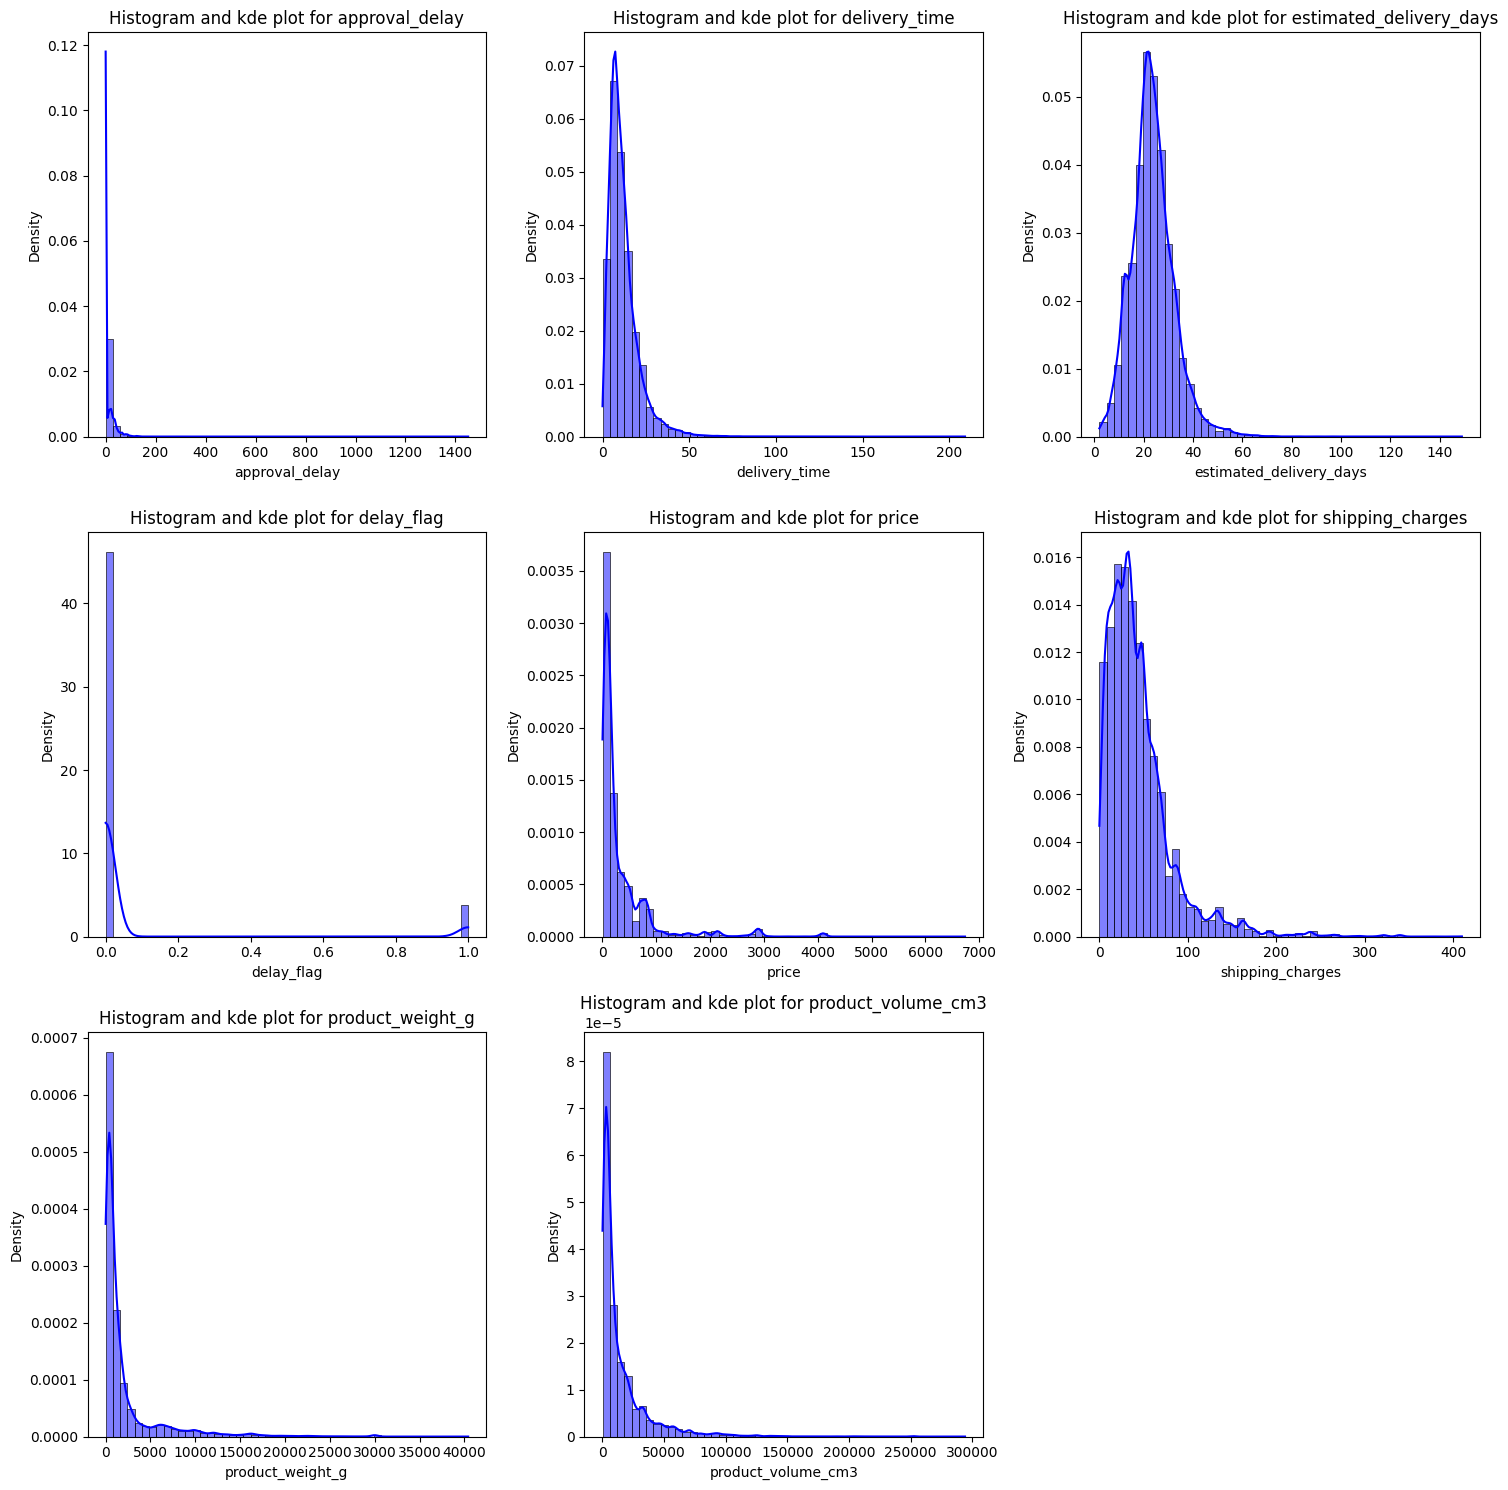

In [29]:
ncols = 3
nrows = (len(train_df.select_dtypes(include=['number']).columns)+ncols-1)//ncols

fig, axes = plt.subplots(nrows, ncols, figsize = (5*ncols, 5*nrows))

axes = axes.flatten()

for i, col in enumerate(train_df.select_dtypes(include=['number']).columns):
  sns.histplot(data=train_df, x = col, kde=True, bins= 50, color='blue', stat='density', ax=axes[i])
  axes[i].set_title(f"Histogram and kde plot for {col}")
  axes[i].set_ylabel("Density")

# removing any empty slots
for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Bivariate Analysis

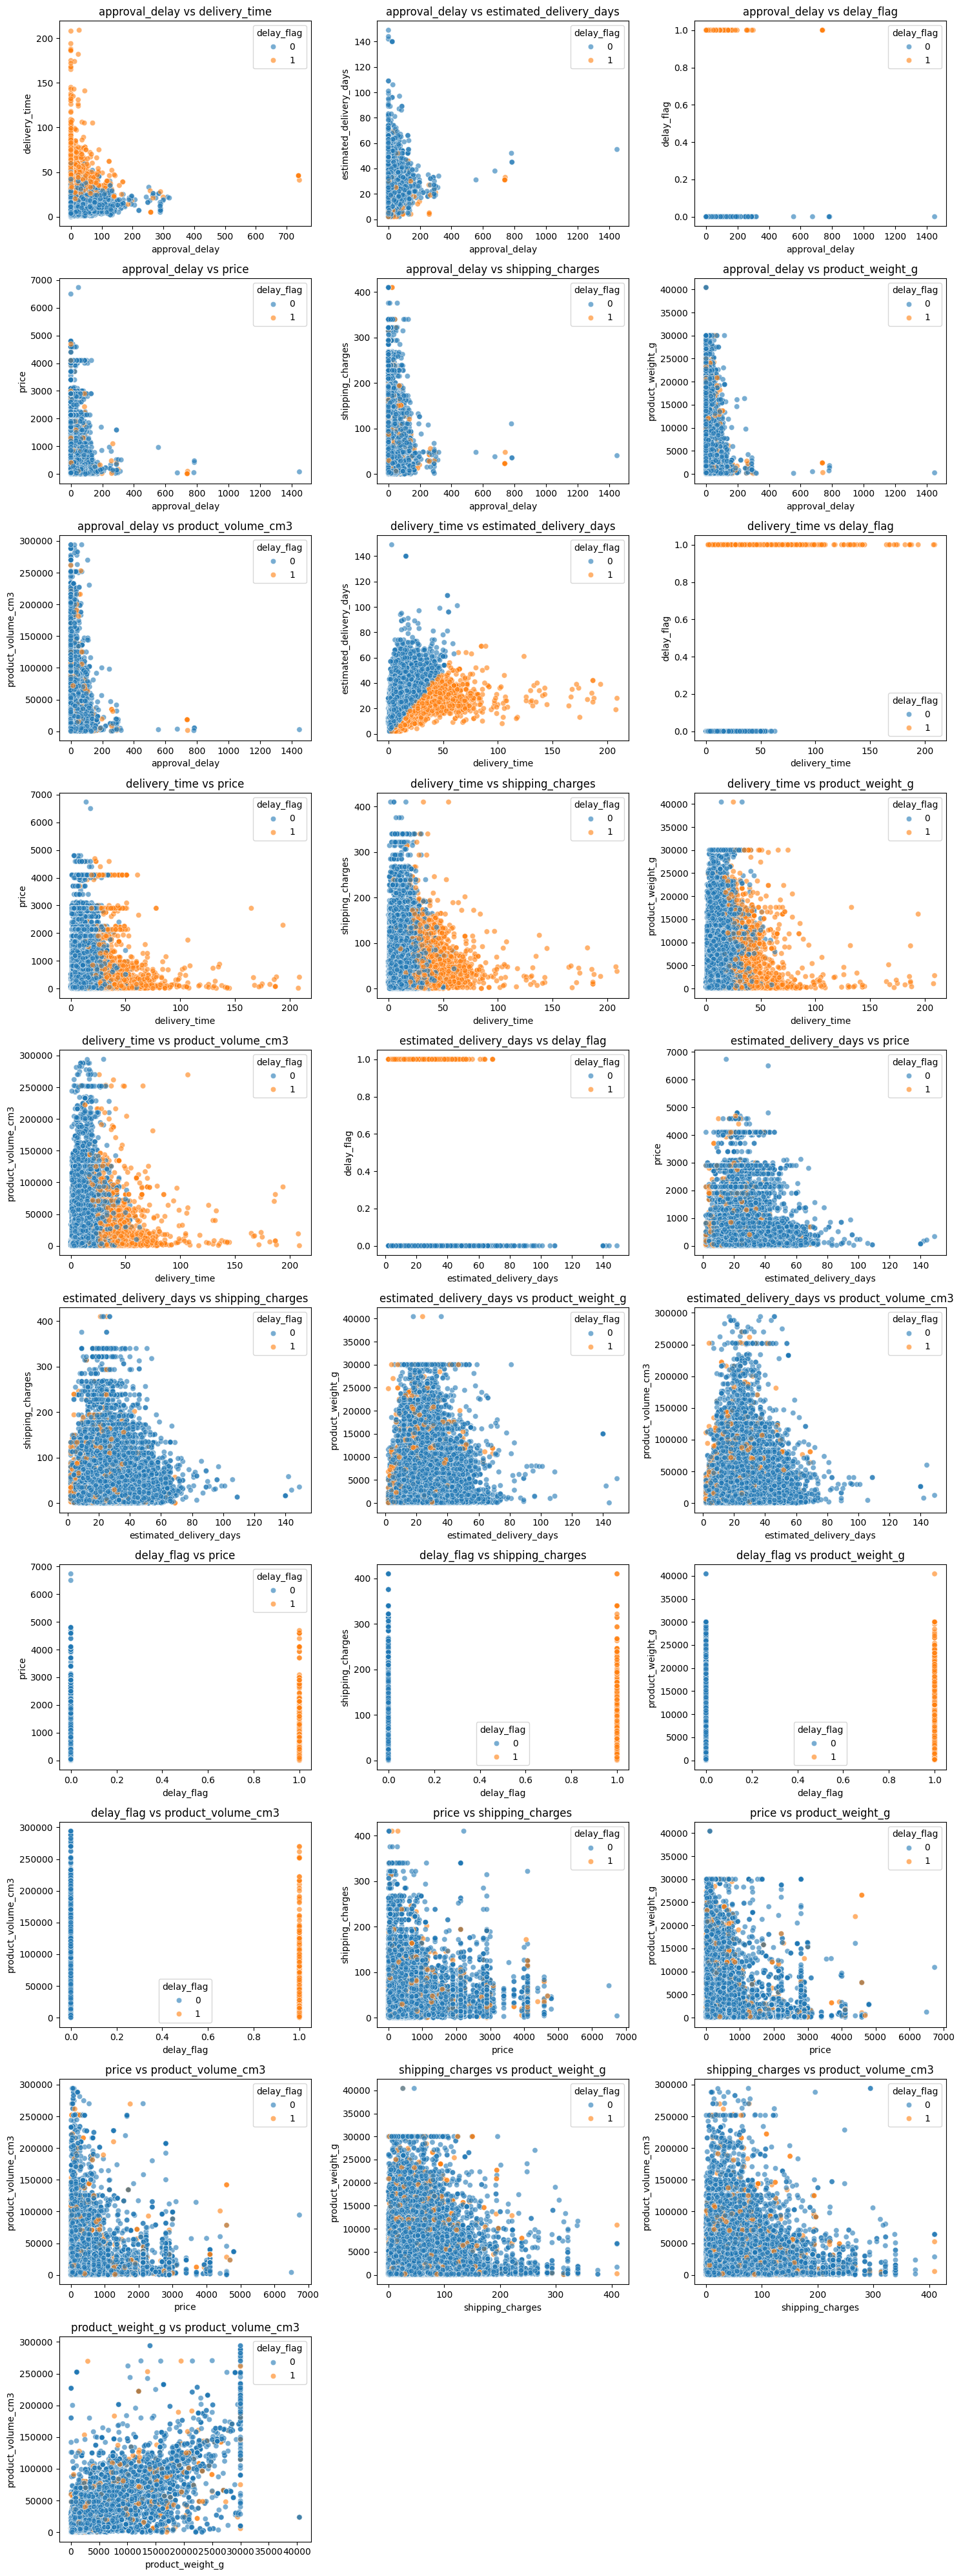

In [30]:
numerinc_columns = train_df.select_dtypes(include=['number']).columns

n_cols = 3
n_rows = (len(list(combinations(numerinc_columns,2)))+n_cols - 1)// n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))

axes = axes.flatten()

for i, (col1, col2) in enumerate(combinations(numerinc_columns,2)):
  sns.scatterplot(data = train_df, x= col1, y = col2, ax=axes[i], alpha = 0.6, hue = 'delay_flag')
  axes[i].set_ylabel(col2)
  axes[i]. set_xlabel(col1)
  axes[i].set_title(f"{col1} vs {col2}")

for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Modeling

In [31]:
def frequency_encode(df, columns):
    for col in columns:
        freq = df[col].value_counts()
        df[col + '_freq'] = df[col].map(freq)
    return df


In [32]:
# Frequency encode
categorical_cols = ['order_id', 'customer_id', 'product_id']
train_df = frequency_encode(train_df, ['product_id'])
train_df.drop(columns=categorical_cols, inplace=True)

In [33]:
#defining a function that will be used to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [34]:
X = train_df.drop(columns=['delay_flag'])
y = train_df['delay_flag']

In [35]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [36]:
numeric_features = X.columns.to_list()

numeric_transformer = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='mean')),
  ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
  ('num', numeric_transformer, numeric_features)
])

#### Baseline model using dummy classifier

In [37]:
dummy_pipeline = Pipeline(steps=[
  ('preprocess', preprocessor),
  ('classifier', DummyClassifier(strategy='most_frequent'))
])

dummy_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['approval_delay',
                                                   'delivery_time',
                                                   'estimated_delivery_days',
                                                   'price', 'shipping_charges',
                                                   'product_weight_g',
                                                   'product_volume_cm3',
                                                   'product_id_freq'])])),
                ('classifier', DummyClassifier(strategy='most_frequent'))])


--- Baseline Dummy Model ---
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     16513
           1       0.00      0.00      0.00      1348

    accuracy                           0.92     17861
   macro avg       0.46      0.50      0.48     17861
weighted avg       0.85      0.92      0.89     17861

Accuracy: 0.9245283018867925
Precision: 0.0
Recall: 0.0


g:\Projects\InternIntelligence\InternIntelligence_Machine_Learning_Model_Development\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\Projects\InternIntelligence\InternIntelligence_Machine_Learning_Model_Development\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\Projects\InternIntelligence\InternIntelligence_Machine_Learning_Model_Development\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with

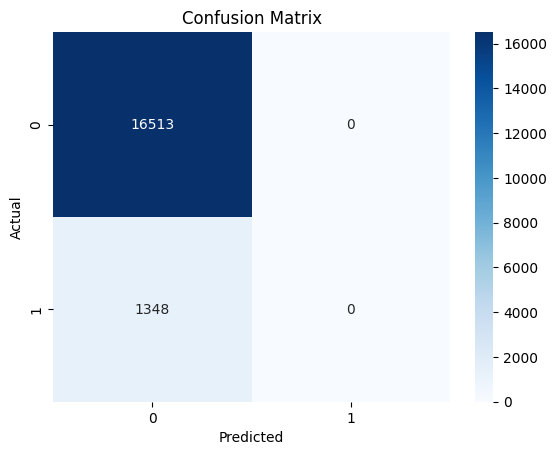

In [46]:
print("\n--- Baseline Dummy Model ---")
evaluate_model(dummy_pipeline, X_test, y_test)

In [39]:
logreg_pipeline = Pipeline(steps=[
  ('preprocess', preprocessor),
  ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000))
])

logreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['approval_delay',
                                                   'delivery_time',
                                                   'estimated_delivery_days',
                                                   'price', 'shipping_charges',
                                                   'product_weight_g',
                                                   'product_volume_cm3',
                                                   'product_id_freq'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])


--- Logistic Regression ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     16513
           1       0.87      1.00      0.93      1348

    accuracy                           0.99     17861
   macro avg       0.93      0.99      0.96     17861
weighted avg       0.99      0.99      0.99     17861

Accuracy: 0.9882985275180561
Precision: 0.8657675016056519
Recall: 1.0


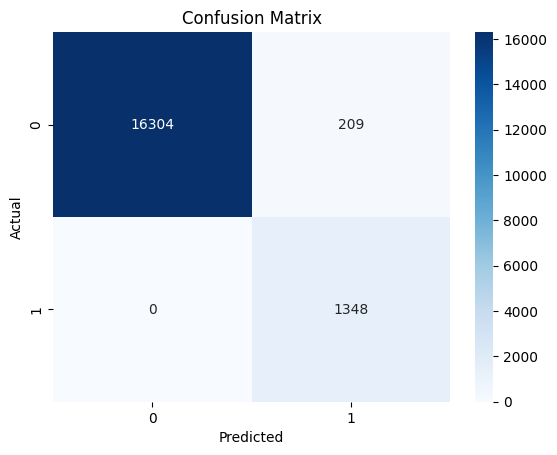

In [47]:
print("\n--- Logistic Regression ---")
evaluate_model(logreg_pipeline, X_test, y_test)

In [41]:
rf_pipeline = ImbPipeline(steps=[
  ("preprocess", preprocessor),
  ('smote', SMOTE(random_state=42)),
  ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])

rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['approval_delay',
                                                   'delivery_time',
                                                   'estimated_delivery_days',
                                                   'price', 'shipping_charges',
                                                   'product_weight_g',
                                                   'product_volume_cm3',
                                                   'product_id_freq'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])


--- Random Forest + SMOTE ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16513
           1       0.95      0.96      0.95      1348

    accuracy                           0.99     17861
   macro avg       0.97      0.98      0.97     17861
weighted avg       0.99      0.99      0.99     17861

Accuracy: 0.9926095963271934
Precision: 0.945095168374817
Recall: 0.9577151335311572


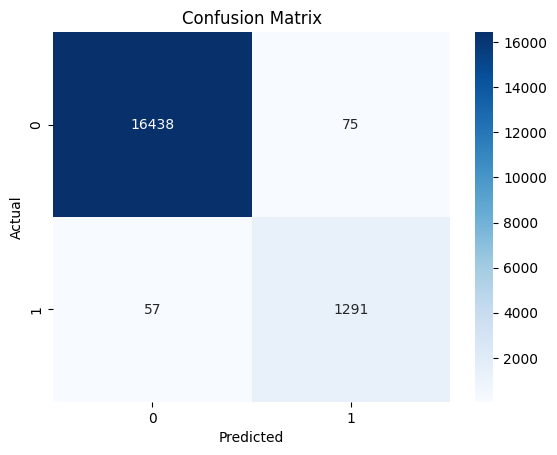

In [48]:
print("\n--- Random Forest + SMOTE ---")
evaluate_model(rf_pipeline, X_test, y_test)

In [44]:
xgb_pipeline = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=3))
])

xgb_pipeline.fit(X_train, y_train)

g:\Projects\InternIntelligence\InternIntelligence_Machine_Learning_Model_Development\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:19:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['approval_delay',
                                                   'delivery_time',
                                                   'estimated_delivery_days',
                                                   'price', 'shipping_charges',
                                                   'product_weight_g',
                                                   'product_volume_cm3',
                                                   'product_id_freq'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 XGBClassif...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])


--- XGBoost Classifier ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     16513
           1       0.94      0.98      0.96      1348

    accuracy                           0.99     17861
   macro avg       0.97      0.99      0.98     17861
weighted avg       0.99      0.99      0.99     17861

Accuracy: 0.9936733665528246
Precision: 0.9351656095842142
Recall: 0.9844213649851632


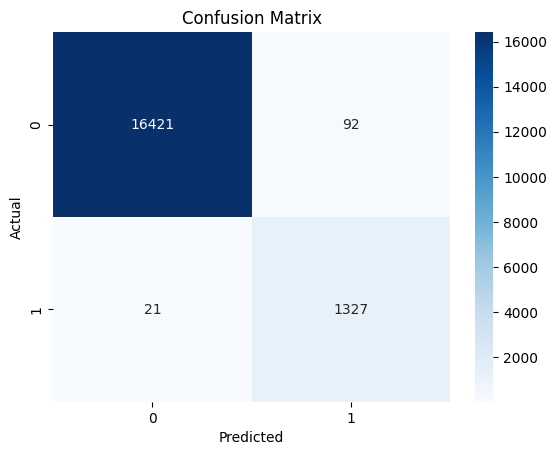

In [49]:
print("\n--- XGBoost Classifier ---")
evaluate_model(xgb_pipeline, X_test, y_test)

#### Model Performance Comparison

| Model                     | Accuracy | Precision | Recall | F1-Score | Notes |
|--------------------------|----------|-----------|--------|----------|-------|
| **Baseline Dummy**       | 0.925    | 0.000     | 0.000  | 0.000    | Predicts majority class only. |
| **Logistic Regression**  | 0.988    | 0.866     | 1.000  | 0.930    | Balanced class weights handled imbalance well. |
| **Random Forest + SMOTE**| 0.993    | 0.945     | 0.958  | 0.951    | Solid improvement with SMOTE. |
| **XGBoost Classifier**   | 0.994    | 0.935     | 0.984  | 0.957    | Best trade-off between precision and recall. |

---

#### Conclusion

- The **Baseline Dummy Model** only predicted the majority class and failed to identify minority cases entirely.
- **Logistic Regression** showed drastic improvement by correctly identifying all delayed deliveries, although precision was slightly lower due to some false positives.
- **Random Forest + SMOTE** gave a balanced and strong performance, significantly improving precision and recall.
- **XGBoost Classifier** emerged as the **best model overall**, achieving high precision (0.935) and the **highest recall (0.984)** with a near-perfect accuracy of **0.994**.

>  **Recommended Model**: **XGBoost Classifier** — due to its excellent generalization and ability to capture delayed deliveries with minimal trade-offs.
